In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import math

In [3]:
np.random.seed(100)
N = 500 # number of data points

In [4]:
t = np.linspace(0, 4*np.pi, N)
# t = t/(max(t))
data = 15.0*np.sin(t+0.001) + 0.05 + np.random.randn(N) # create artificial data with noise
# data = 3.0*np.sin(t+100) 

In [5]:
df= pd.DataFrame({'X1':t, 'Y':data})

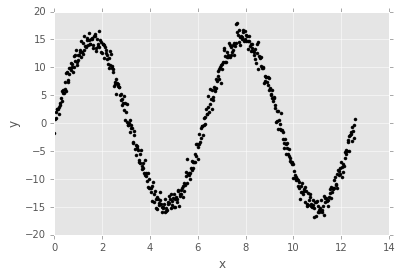

In [6]:
def plot_data(data =df):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data()

In [7]:
def polynomial_data(data, power =1):
    tmp_df = pd.DataFrame()
    col_degree = ['X'+str(i) for i in range(1,power+1)]
    
    for i in range(1,power+1):
        tmp_df[col_degree[i-1]]=df['X1']**i
        
    return tmp_df

In [33]:
#5 degree polynomial
# df_poly = pd.concat([polynomial_data(df,5), df['Y']], axis=1)

In [81]:
#n degree polynomial
df_poly = pd.concat([polynomial_data(df,50), df['Y']], axis=1)

In [82]:
df_poly.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,Y
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.684765
1,0.025183,0.000634,0.000016,4.021956e-07,1.012853e-08,2.550680e-10,6.423404e-12,1.617613e-13,4.073651e-15,1.025872e-16,...,7.024111e-68,1.768889e-69,4.454613e-71,1.121810e-72,2.825066e-74,7.114395e-76,1.791626e-77,4.511870e-79,1.136229e-80,0.785382
2,0.050366,0.002537,0.000128,6.435129e-06,3.241131e-07,1.632435e-08,8.221957e-10,4.141089e-11,2.085710e-12,1.050493e-13,...,3.089237e-55,1.555932e-56,7.836639e-58,3.947018e-59,1.987964e-60,1.001262e-61,5.042978e-63,2.539957e-64,1.279280e-65,1.973190
3,0.075549,0.005708,0.000431,3.257784e-05,2.461234e-06,1.859445e-07,1.404798e-08,1.061316e-09,8.018168e-11,6.057672e-12,...,7.685711e-48,5.806503e-49,4.386774e-50,3.314178e-51,2.503839e-52,1.891633e-53,1.429116e-54,1.079688e-55,8.156966e-57,0.944683
4,0.100732,0.010147,0.001022,1.029621e-04,1.037162e-05,1.044758e-06,1.052410e-07,1.060119e-08,1.067883e-09,1.075705e-10,...,1.358661e-42,1.368612e-43,1.378636e-44,1.388734e-45,1.398905e-46,1.409151e-47,1.419472e-48,1.429869e-49,1.440342e-50,2.554676


In [83]:
import h2o
h2o.init(min_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 18 mins
H2O cluster version:,3.10.0.10
H2O cluster version age:,3 months and 26 days !!!
H2O cluster name:,H2O_from_python_user_fawld0
H2O cluster total nodes:,1
H2O cluster free memory:,1.851 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [84]:
hdf= h2o.H2OFrame(df_poly)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [85]:
hdf_train, hdf_validate = hdf.split_frame(ratios=[0.70], seed=10)

In [86]:
input_name= hdf.col_names
input_name.remove('Y')
input_name

[u'X1',
 u'X2',
 u'X3',
 u'X4',
 u'X5',
 u'X6',
 u'X7',
 u'X8',
 u'X9',
 u'X10',
 u'X11',
 u'X12',
 u'X13',
 u'X14',
 u'X15',
 u'X16',
 u'X17',
 u'X18',
 u'X19',
 u'X20',
 u'X21',
 u'X22',
 u'X23',
 u'X24',
 u'X25',
 u'X26',
 u'X27',
 u'X28',
 u'X29',
 u'X30',
 u'X31',
 u'X32',
 u'X33',
 u'X34',
 u'X35',
 u'X36',
 u'X37',
 u'X38',
 u'X39',
 u'X40',
 u'X41',
 u'X42',
 u'X43',
 u'X44',
 u'X45',
 u'X46',
 u'X47',
 u'X48',
 u'X49',
 u'X50']

In [87]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [93]:
dl0 = H2ODeepLearningEstimator(seed =10,hidden =[500, 500, 599], epochs =5000,l2=1e-55, model_id='dl10')
dl0.train(x = input_name, y = 'Y', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


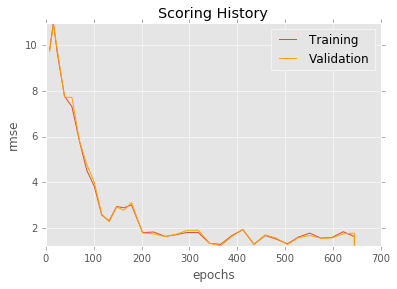

In [94]:
dl0.plot()

In [95]:
print 'train mse: ', dl0.mse(train=True)
print 'valid mse: ', dl0.mse(valid=True)

train mse:  1.63089437004
valid mse:  1.47970865993


In [96]:
# model = h2o.estimators.deeplearning(x=input_name, y='Y', training_frame=hdf_train, validation_frame=hdf_validate,
#                                     distribution="multinomial", activation="RectifierWithDropout", 
#                                     hidden=[10,10,10], input_dropout_ratio=0.2, l1=1e-5, epochs=10)


deeplearning prediction progress: |███████████████████████████████████████| 100%


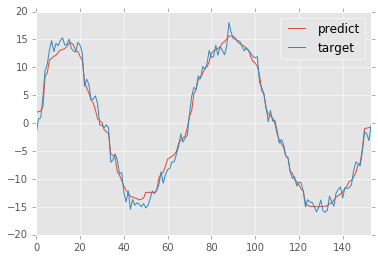

In [97]:
prediction= dl0.predict(hdf_validate)

prediction['target']=hdf_validate['Y']
output= prediction.as_data_frame()
output.plot()